In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from dataset import *

import matplotlib.ticker as ticker

In [2]:
activations_save = {
    "relu": "ReLU",
    "elu": "ELU",
    "gelu": "GELU",
    "leaky-relu": "Leaky ReLU",
    "quadratic": "Quadratic",
}

# Accuracy vs. width for different activation functions

In [8]:
dim = 16
#widths = [32, 64, 128, 256, 512, 1024]
widths = [8, 16, 32, 64, 128, 256]
activations = ["relu", "elu", "gelu", "leaky-relu", "quadratic"]
K = 2
#angle = 0
rank = 4
num_trials = 10

In [9]:
# Load in saved results
train_accs = np.zeros((num_trials, len(widths), len(activations)))
test_accs = np.zeros((num_trials, len(widths), len(activations)))


for k in range(num_trials):
    trial_dir = "trial_" + str(k)
    for (i, width) in enumerate(widths):
        for (j, activation) in enumerate(activations):
            results_dir = "save/hybrid/activations/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(K) + "_classes_rank_" + str(rank) + "_" + activation + "_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            train_accs[k, i, j] = np.max(cur_train_accs)

            test_accs[k, i, j] = np.max(test_result['test_accuracy'])

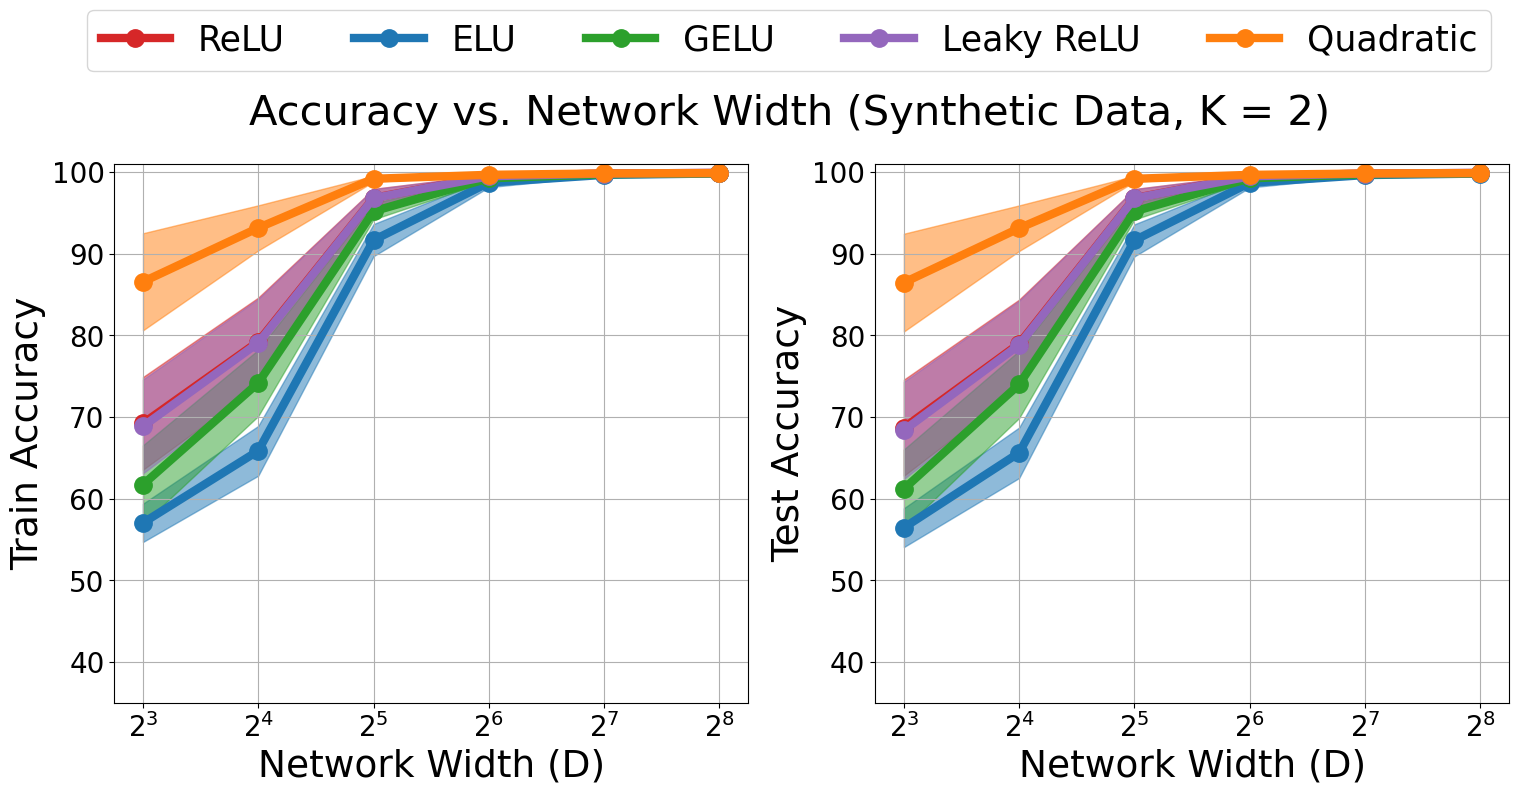

In [10]:
# Plot results
train_accs_mean = np.mean(train_accs, axis=0)
train_accs_std = np.std(train_accs, axis=0)

test_accs_mean = np.mean(test_accs, axis=0)
test_accs_std = np.std(test_accs, axis=0)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))

dim_base = int(np.log2(dim))
dim_save = str(dim)

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 

# Plot training
#ax1.set_xlabel(r'Network Width (D)', fontsize=27)
ax1.set_ylabel('Train Accuracy', fontsize=27)
#ax1.set_title('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=22)

lns = []
for i in range(len(activations)):
    l_i = ax1.plot(widths, list(train_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=activations_save[activations[i]])
    ax1.fill_between(widths, list(train_accs_mean[:, i] - train_accs_std[:, i]), list(train_accs_mean[:, i] + train_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax1.grid()
ax1.set_ylim(35, 101)

# Plot testing
#ax2.set_xlabel(r'Network Width (D)', fontsize=27)
ax2.set_ylabel('Test Accuracy', fontsize=27)
#ax2.set_title('Accuracy vs. Network Width (d = ' + str(dim) + ', r = ' + str(rank) + ')', fontsize=22)

lns = []
for i in range(len(activations)):
    l_i = ax2.plot(widths, list(test_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label=activations_save[activations[i]])
    ax2.fill_between(widths, list(test_accs_mean[:, i] - test_accs_std[:, i]), list(test_accs_mean[:, i] + test_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    
    lns += l_i

ax2.set_xscale('log', base=2)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax2.grid()
ax2.set_ylim(35, 101)

fig.suptitle('Accuracy vs. Network Width (Synthetic Data, K = ' + str(K) + ')', fontsize=30)
fig.supxlabel('Network Width (D)', fontsize=27)
fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.125), ncol=len(activations), fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Accuracy vs. width for different number of classes 

In [3]:
dim = 128
#widths = [32, 64, 128, 256, 512, 1024]
widths = [8, 16, 32, 64, 128, 256, 512, 1024]
K = [2, 4, 8, 16, 32]
angle = 0
rank = 16
num_trials = 10

In [6]:
# Load in saved results
relu_train_accs = np.zeros((num_trials, len(widths), len(K)))
relu_test_accs = np.zeros((num_trials, len(widths), len(K)))


for i in range(num_trials):
    trial_dir = "trial_" + str(i)
    for (j, width) in enumerate(widths):
        for (k, cla) in enumerate(K):
            results_dir = "save/num_classes_sweep/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(cla) + "_classes_rank_" + str(rank) + "_relu_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            relu_train_accs[i, j, k] = np.max(cur_train_accs)

            relu_test_accs[i, j, k] = np.max(test_result['test_accuracy'])

            
quad_train_accs = np.zeros((num_trials, len(widths), len(K)))
quad_test_accs = np.zeros((num_trials, len(widths), len(K)))


for i in range(num_trials):
    trial_dir = "trial_" + str(i)
    for (j, width) in enumerate(widths):
        for (k, cla) in enumerate(K):
            results_dir = "save/num_classes_sweep/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(cla) + "_classes_rank_" + str(rank) + "_quadratic_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            quad_train_accs[i, j, k] = np.max(cur_train_accs)

            quad_test_accs[i, j, k] = np.max(test_result['test_accuracy'])

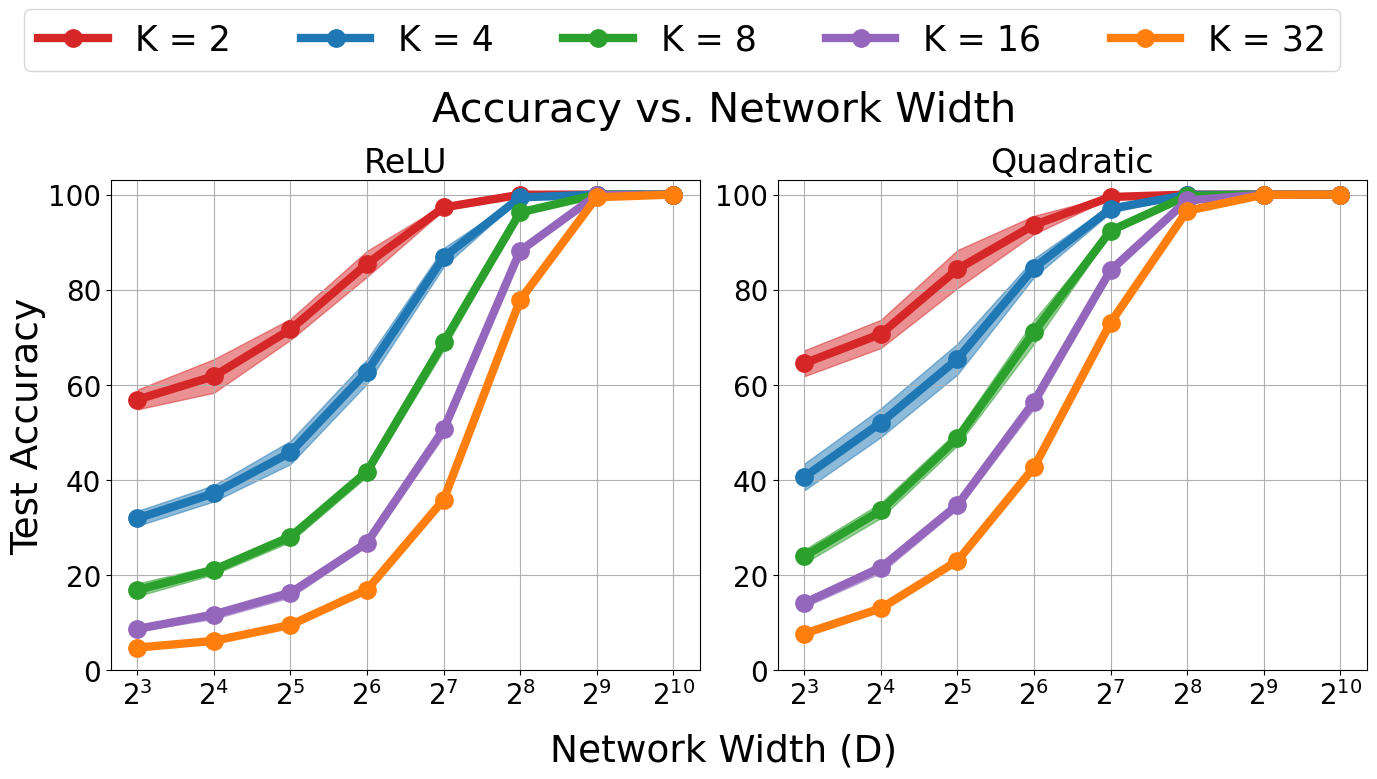

In [13]:
# Plot results
relu_train_accs_mean = np.mean(relu_train_accs, axis=0)
relu_train_accs_std = np.std(relu_train_accs, axis=0)

relu_test_accs_mean = np.mean(relu_test_accs, axis=0)
relu_test_accs_std = np.std(relu_test_accs, axis=0)


quad_train_accs_mean = np.mean(quad_train_accs, axis=0)
quad_train_accs_std = np.std(quad_train_accs, axis=0)

quad_test_accs_mean = np.mean(quad_test_accs, axis=0)
quad_test_accs_std = np.std(quad_test_accs, axis=0)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 7))

dim_base = int(np.log2(dim))
dim_save = str(dim)

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 

# Plot training
#ax1.set_xlabel(r'Network Width (D)', fontsize=27)
#ax1.set_ylabel('Test Accuracy', fontsize=27)
ax1.set_title('ReLU', fontsize=24)

lns = []
for i in range(len(K)):
    l_i = ax1.plot(widths, list(relu_test_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label='K = ' + str(K[i]))
    ax1.fill_between(widths, list(relu_test_accs_mean[:, i] - relu_train_accs_std[:, i]), list(relu_test_accs_mean[:, i] + relu_test_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator())
ax1.set_xticks(widths)
#ax1.set_xticklabels(widths)

labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax1.grid()
ax1.set_ylim(0, 103)

# Plot testing
#ax2.set_xlabel(r'Network Width (D)', fontsize=27)
#ax2.set_ylabel('Train Accuracy', fontsize=27)
ax2.set_title('Quadratic', fontsize=24)

lns = []
for i in range(len(K)):
    l_i = ax2.plot(widths, list(quad_test_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label="K = " + str(K[i]))
    ax2.fill_between(widths, list(quad_test_accs_mean[:, i] - quad_test_accs_std[:, i]), list(quad_test_accs_mean[:, i] + quad_test_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    
    lns += l_i

ax2.set_xscale('log', base=2)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.set_xticks(widths)

labs = [l.get_label() for l in lns]
#ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax2.grid()
ax2.set_ylim(0, 103)

fig.suptitle('Accuracy vs. Network Width', fontsize=30, x=0.53)
fig.supxlabel('Network Width (D)', fontsize=27, x=0.53)
fig.supylabel('Test Accuracy', fontsize=27)
fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.12), ncol=len(K), fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Rank sweeps for ReLU and quadratic

In [5]:
dim = 128
#widths = [32, 64, 128, 256, 512, 1024]
widths = [8, 16, 32, 64, 128, 256, 512, 1024]
#activations = ["relu", "quadratic"]
K = 2
#angle = 0
ranks = [4, 8, 16, 32, 64]
num_trials = 10

In [6]:
relu_train_accs = np.zeros((num_trials, len(widths), len(ranks)))
relu_test_accs = np.zeros((num_trials, len(widths), len(ranks)))

for i in range(num_trials):
    trial_dir = "trial_" + str(i)
    for (j, width) in enumerate(widths):
        for (k, rank) in enumerate(ranks):
            results_dir = "/scratch/qingqu_root/qingqu1/alecx/uos-linear-separability/save/rank_sweep/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(K) + "_classes_rank_" + str(rank) + "_relu_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            relu_train_accs[i, j, k] = np.max(cur_train_accs)

            relu_test_accs[i, j, k] = np.max(test_result['test_accuracy'])

            
quad_train_accs = np.zeros((num_trials, len(widths), len(ranks)))
quad_test_accs = np.zeros((num_trials, len(widths), len(ranks)))
for i in range(num_trials):
    trial_dir = "trial_" + str(i)
    for (j, width) in enumerate(widths):
        for (k, rank) in enumerate(ranks):
            results_dir = "save/rank_sweep/width_" + str(width) + "_depth_2_nonlinear_depth_1_" + str(K) + "_classes_rank_" + str(rank) + "_quadratic_activation_seed_0"
            train_best_result = torch.load(os.path.join(results_dir, trial_dir, "best.pth"), map_location=torch.device('cpu'))
            test_result = torch.load(os.path.join(results_dir, trial_dir, "test.pth"), map_location=torch.device('cpu'))

            cur_train_accs = train_best_result['train_accuracies']
            quad_train_accs[i, j, k] = np.max(cur_train_accs)

            quad_test_accs[i, j, k] = np.max(test_result['test_accuracy'])

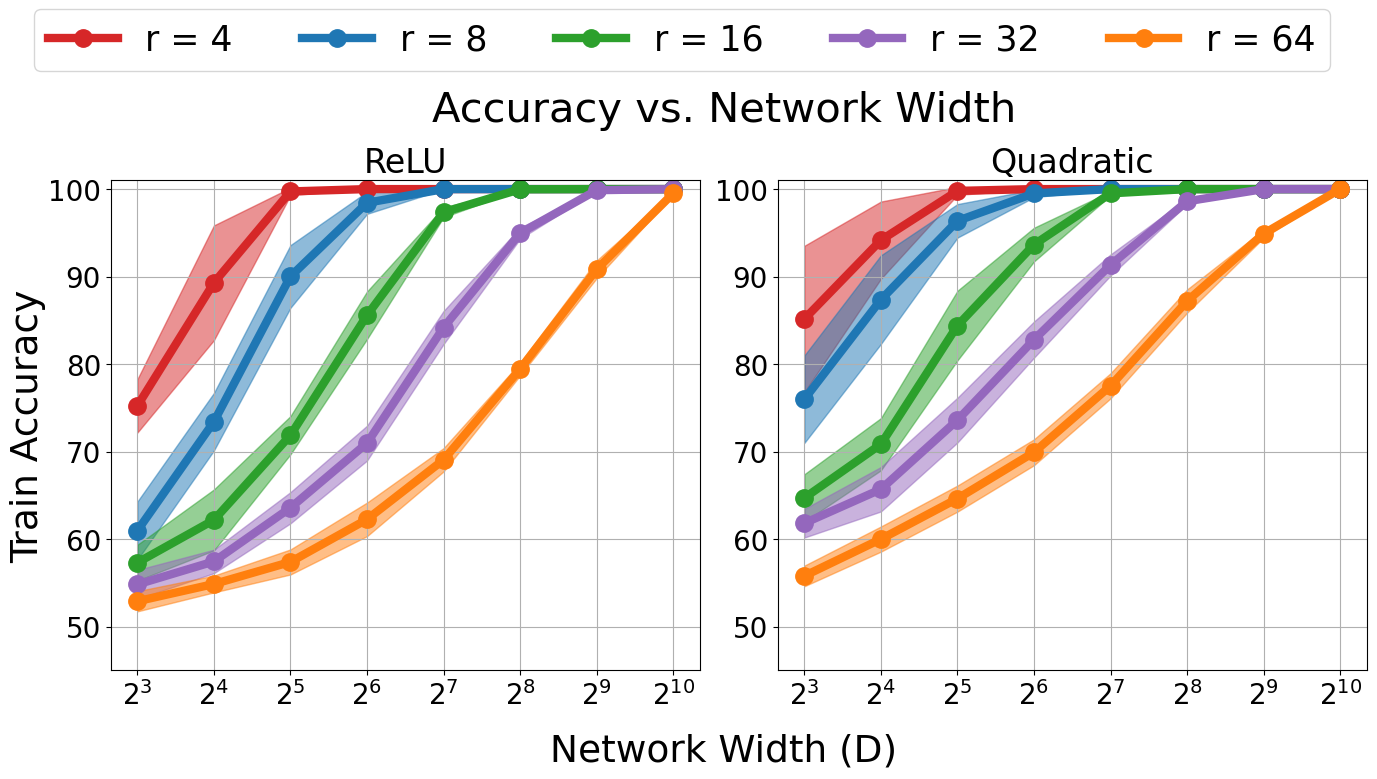

In [80]:
# Plot results
relu_train_accs_mean = np.mean(relu_train_accs, axis=0)
relu_train_accs_std = np.std(relu_train_accs, axis=0)

relu_test_accs_mean = np.mean(relu_test_accs, axis=0)
relu_test_accs_std = np.std(relu_test_accs, axis=0)


quad_train_accs_mean = np.mean(quad_train_accs, axis=0)
quad_train_accs_std = np.std(quad_train_accs, axis=0)

quad_test_accs_mean = np.mean(quad_test_accs, axis=0)
quad_test_accs_std = np.std(quad_test_accs, axis=0)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 7))

dim_base = int(np.log2(dim))
dim_save = str(dim)

start_idx = 1
lw = 6
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple', 'tab:orange'] 

# Plot training
#ax1.set_xlabel(r'Network Width (D)', fontsize=27)
#ax1.set_ylabel('Test Accuracy', fontsize=27)
ax1.set_title('ReLU', fontsize=24)

lns = []
for i in range(len(ranks)):
    l_i = ax1.plot(widths, list(relu_train_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label='r = ' + str(ranks[i]))
    ax1.fill_between(widths, list(relu_train_accs_mean[:, i] - relu_train_accs_std[:, i]), list(relu_train_accs_mean[:, i] + relu_train_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    lns += l_i

ax1.set_xscale('log', base=2)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator())
ax1.set_xticks(widths)
#ax1.set_xticklabels(widths)

labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax1.grid()
ax1.set_ylim(45, 101)

# Plot testing
#ax2.set_xlabel(r'Network Width (D)', fontsize=27)
#ax2.set_ylabel('Train Accuracy', fontsize=27)
ax2.set_title('Quadratic', fontsize=24)

lns = []
for i in range(len(ranks)):
    l_i = ax2.plot(widths, list(quad_train_accs_mean[:, i]), color=colors[i], linewidth=lw, marker=".", markersize=25,
                  label="r = " + str(ranks[i]))
    ax2.fill_between(widths, list(quad_train_accs_mean[:, i] - quad_train_accs_std[:, i]), list(quad_train_accs_mean[:, i] + quad_train_accs_std[:, i]), 
                     color=colors[i], alpha=0.5)
    
    lns += l_i

ax2.set_xscale('log', base=2)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.set_xticks(widths)

labs = [l.get_label() for l in lns]
#ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax2.grid()
ax2.set_ylim(45, 101)

fig.suptitle('Accuracy vs. Network Width', fontsize=30, x=0.53)
fig.supxlabel('Network Width (D)', fontsize=27, x=0.53)
fig.supylabel('Train Accuracy', fontsize=27)
fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.12), ncol=len(ranks), fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Linear Probing Accuracy during Training

In [15]:
dim = 16
rank = 4
width = 128
K = 2
num_trials = 5
num_epochs = 100
layers_to_probe = 2
depth = 3
nonlinear_depth = 2

In [16]:
relu_train_accs = np.zeros((num_trials, num_epochs+1, layers_to_probe))
relu_val_accs = np.zeros((num_trials, num_epochs+1, layers_to_probe))
                         
for i in range(num_trials):
    trial_dir = 'trial_' + str(i)
    for j in range(num_epochs+1):
        for k in range(layers_to_probe):
            results_dir = "./save/linear_probe_during_train_noise/width_" + str(width) + '_depth_' + str(depth) + '_nonlinear_depth_' + str(nonlinear_depth) + '_' + str(K) + '_classes_rank_' + str(rank) + '_relu_activation_seed_0'
            fname = 'layer_' + str(k) + '_last_epoch_' + str(j) + '_probe.pth'
            result = torch.load(os.path.join(results_dir, trial_dir, fname), map_location=torch.device('cpu'))

            relu_train_accs[i, j, k] = result['train_accuracy']
            relu_val_accs[i, j, k] = result['val_accuracy']



quad_train_accs = np.zeros((num_trials, num_epochs+1, layers_to_probe))
quad_val_accs = np.zeros((num_trials, num_epochs+1, layers_to_probe))
for i in range(num_trials):
    trial_dir = "trial_" + str(i)
    for j in range(num_epochs+1):
        for k in range(layers_to_probe):
            results_dir = './save/linear_probe_during_train_noise/width_' + str(width) + '_depth_' + str(depth) + '_nonlinear_depth_' + str(nonlinear_depth) + '_' + str(K) + '_classes_rank_' + str(rank) + '_quadratic_activation_seed_0'            
            fname = 'layer_' + str(k) + '_last_epoch_' + str(j) + '_probe.pth'
            result = torch.load(os.path.join(results_dir, trial_dir, fname), map_location=torch.device('cpu'))
            
            quad_train_accs[i, j, k] = result['train_accuracy']
            quad_val_accs[i, j, k] = result['val_accuracy']


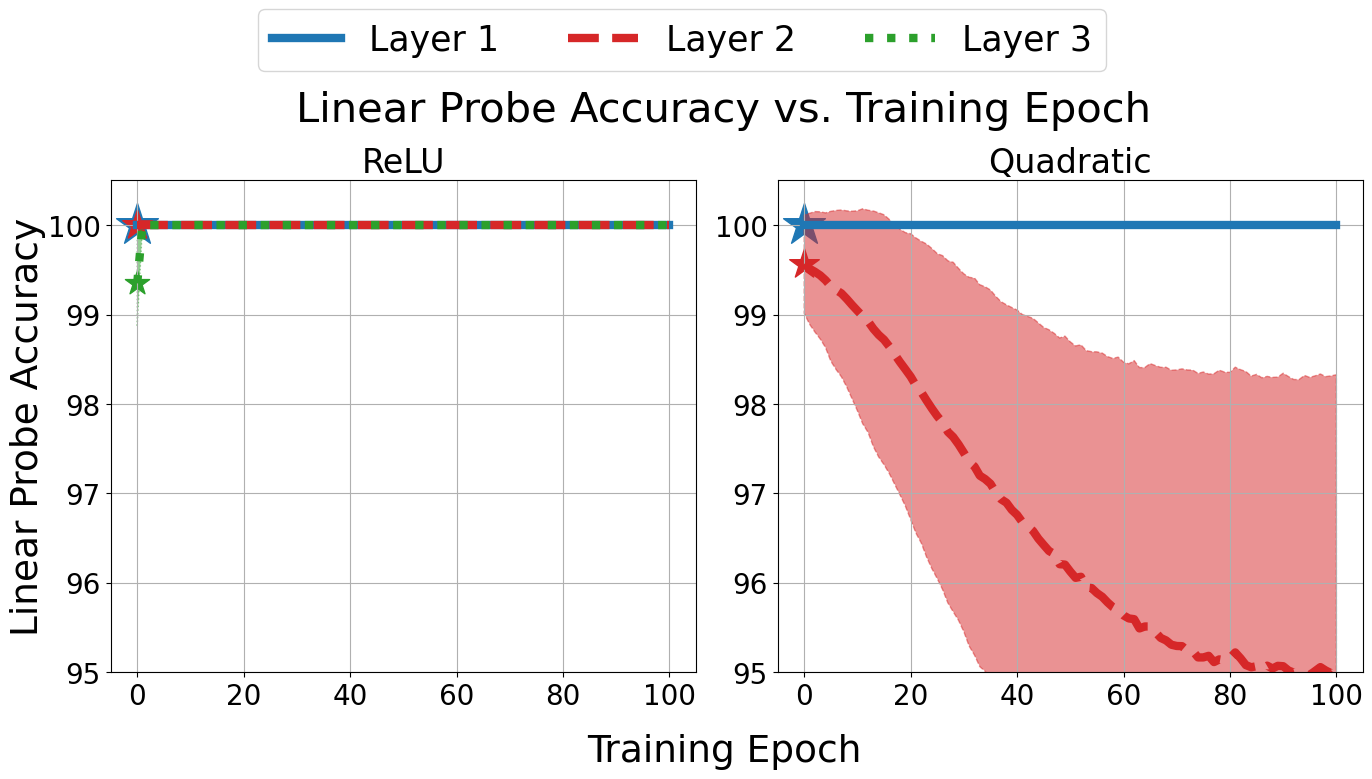

In [17]:
# Plot results
relu_accs_mean = np.mean(relu_train_accs, axis=0)
relu_accs_std = np.std(relu_train_accs, axis=0)

quad_accs_mean = np.mean(quad_train_accs, axis=0)
quad_accs_std = np.std(quad_train_accs, axis=0)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 7))

dim_base = int(np.log2(dim))
dim_save = str(dim)

start_idx = 1
lw = 6
colors = ['tab:blue', 'tab:red', 'tab:green'] #, 'tab:purple', 'tab:orange'] 
linestyles = ['solid', 'dashed', 'dotted']

# Plot training
ax1.set_title('ReLU', fontsize=24)

lns = []
for i in range(layers_to_probe):
    l_i = ax1.plot(list(np.arange(num_epochs + 1)), list(relu_accs_mean[:, i]), color=colors[i], linewidth=lw, linestyle=linestyles[i], label='Layer ' + str(i + 1))
    ax1.fill_between(list(np.arange(num_epochs + 1)), list(relu_accs_mean[:, i] - relu_accs_std[:, i]), list(relu_accs_mean[:, i] + relu_accs_std[:, i]), 
                     linestyle=linestyles[i], color=colors[i], alpha=0.5)
    ax1.scatter(0, relu_accs_mean[0, i], marker='*', s=1000/(i+1), color=colors[i])
    lns += l_i
    
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator())
#ax1.set_xticks(widths)
#ax1.set_xticklabels(widths)

labs = [l.get_label() for l in lns]
#ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax1.grid()
ax1.set_ylim(95, 100.5)
#ax1.set_yticks([98, 99, 100])

# Plot testing
#ax2.set_xlabel(r'Network Width (D)', fontsize=27)
#ax2.set_ylabel('Train Accuracy', fontsize=27)
ax2.set_title('Quadratic', fontsize=24)

lns = []
for i in range(layers_to_probe):
    l_i = ax2.plot(list(np.arange(num_epochs + 1)), list(quad_accs_mean[:, i]), color=colors[i], linewidth=lw, linestyle=linestyles[i], label="Layer " + str(i + 1))
    ax2.fill_between(list(np.arange(num_epochs + 1)), list(quad_accs_mean[:, i] - quad_accs_std[:, i]), list(quad_accs_mean[:, i] + quad_accs_std[:, i]), 
                     linestyle=linestyles[i], color=colors[i], alpha=0.5)
    ax2.scatter(0, quad_accs_mean[0, i], marker='*', s=1000 / (i+1), color=colors[i])
    
    lns += l_i

ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)

labs = [l.get_label() for l in lns]
#ax2.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.20), ncol=5, fontsize=15)
ax2.grid()
ax2.set_ylim(95, 100.5)
#ax2.set_yticks([98, 99, 100])

fig.suptitle('Linear Probe Accuracy vs. Training Epoch', fontsize=30, x=0.53)
fig.supxlabel('Training Epoch', fontsize=27, x=0.53)
fig.supylabel('Linear Probe Accuracy', fontsize=27)
fig.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5,1.12), ncol=layers_to_probe, fontsize=25)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

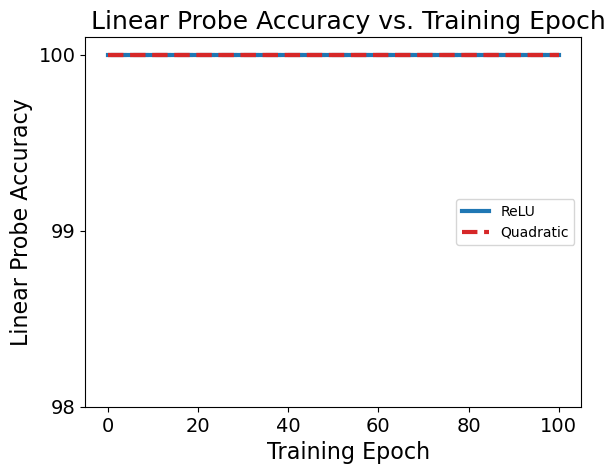

In [35]:
# Plot results
relu_accs_mean = np.mean(relu_train_accs, axis=0)
relu_accs_std = np.std(relu_train_accs, axis=0)

quad_accs_mean = np.mean(quad_train_accs, axis=0)
quad_accs_std = np.std(quad_train_accs, axis=0)

plt.figure()
lw = 3

epochs_plot = list(np.arange(num_epochs+1))

plt.plot(epochs_plot, list(relu_accs_mean), color='tab:blue', linewidth=lw, label='ReLU')
plt.fill_between(epochs_plot, list(relu_accs_mean - relu_accs_std), list(relu_accs_mean + relu_accs_std), color='tab:blue', alpha=0.5)
plt.plot(epochs_plot, list(quad_accs_mean), color='tab:red', linewidth=lw, linestyle='dashed', label='Quadratic')
plt.fill_between(epochs_plot, list(quad_accs_mean - quad_accs_std), list(quad_accs_mean + quad_accs_std), linewidth=lw, linestyle='dashed', color='tab:red', alpha=0.5)

plt.ylim([98, 100.1])
plt.yticks([98, 99, 100])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.title('Linear Probe Accuracy vs. Training Epoch', fontsize=18, x=0.53)
plt.xlabel('Training Epoch', fontsize=16, x=0.53)
plt.ylabel('Linear Probe Accuracy', fontsize=16)
plt.legend(loc='right')
#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()